# Section 4: Data - A modern approach 
![Pangeo Logo ](images/pangeo_logo_small.png)

[Pangeo Website](https://pangeo.io/)

It's all very well having a distributed, massively parallel scientific compute platform available. If we don't use it properly, our tasks won't make best use of the infrastructure. There are two primary blockers to making best use of the platform: poorly written source code and poorly strcutured datasets.  Hopefully with the tools and libraries that are now available for scientific computing, such as dask, users of the platform in general, and specifically our first use case of Scientific Analyst or Researcher it willl be easy to set up and use for interactive computing at scale. We can write code that clearly communicates our intentions to some one reading the code, while underlying libraries ensure that it is efficiently executed by the compute platform (meeting the goal of separation of concerns). The next challenge is the data we work with. One might think the data is what it is, and it's up to the code to deal with approiately, but that is not the case. Those who create the dataset, primarily the second use case of Data Engineer, can do a lot to make it easier to use later. The challenge of presenting data so it is easy to consume and understand is an old one.

## An Historical Digression - Reading ancient texts

![Codex Sinaticus](https://www.bl.uk/britishlibrary/~/media/bl/global/dst%20discovering%20sacred%20texts/collection%20items/codexsinaiticus-add_ms_43725_f244v.jpg?w=608&h=342&hash=11BF1F0A1DE8CAC524DE050F912D7AD7)

When we look at text, we see a lot of element that we may not think much about that add a lot to our understanding of what the text contains. For example, there are punctuation marks to divide the text into sentences and phrases. In addition, there are gaps left to indicate paragraphs, quotes, lists etc. Using whitespace for meaning was by no means invented by Python! As you can see from the accompanying pictures, text in ancient manuscripts often had none of these helpful elements. In some languages the vowels were not even explictly specified All all the text was nominally there, but actually reading it, particuarly reading it out loud, required a lot of skill to interpret what was recorded on the page. There was a proffession of *lektors* who were proffessional readers, because the skills required for reading any substantial text required a lot of training and practice. Much oif the burden of reading was placed on the consumer of the manuscript rather than the the producer.

Over time our way of writing has evolved to provide as much help for the reader as possible, so that the person reading can focus on the actual content of the document they are readfing, rather than the skill of reading itself. We expect a lot more of the writer, but they are the one who best knows the context and the meaning and so are best placed to help other interpret the text through whitespace, puntuation etc.

## The Goal - Data for reproducible, shareable research
That "fun" historical digression does have a point relevant to this course, that is that we want to make it as ewasy as possible for our data to be used by researchers and for data producers to provide as much help as possible in accesing, loading and analysing the data. It is not enough that that the raw data is present, it needs to be described by sufficient metadata and strcutured for effcient access. Data consumers should require skills in the domain the data describes to understasnd the contents, but require as  little as possible in terms of skills in the areas of data and software engineering. 


![Data Description Levels](images/data_description_levels.png)

We might think of different levels of descriptiveness and ease of access for datasets.

* *Raw Data* - A series of text or binary files with the data values but no description of what they mean e.g. units. Finding the data you need and pulling it together into a coherent dataset requires knwloedge from elsewhere.
* *Described data files* - Data is provided as a series of files which contain a description of the data contained within (metadata). Accesing a whole dataset requires figuring out paths to many different files, which may not have consistent metadata across files. 
* *Described dataset* - All data in a dataset is accessed through a single descriptor and contains all descriptions necessary for some one skilled in the domain the data describes to interpret the data. The  " behind the scenes" structures may still be as a series of files and directories, but the user consumes the datasets as a unified whole.


https://pangeo.io/data.html

In creating a dataset we should ensure our data follows the FAIR principle, that it is *Findable*, *Accesible*, *Interoperable* and *Reusable*, and is *Analysis-Ready* and *Cloud Optimised*. Lets dig a bit deeper into what those terms really mean and what we can do to ensure we are following those principles.

## FAIR data

The FAIR principles are intended to ensure that it is easy for other to use the data that we produce so that research can build on the work of others as erfficiently as possible rather than endlessly reinventing the wheel. The principles state that data should be:

* **Findable** - A researcher should easily be able to find the data that exists related to the problem that they are working on. This relies on sufficiently detailed description of datasets being contained in the metadata and being accessible without reading the whole dataset.An emerging technology is *data search engines*, which aim to make finding data as easy as finding a web page is through web search engines.
* **Accessible** - Once a researcher has found a dataset that they have determined will be a useful input to their pipeline in addressing a research question, they should easily be able to access that data.
* **Interoperable**  - The user should be able to load the data into the tool of their choice and integrate with the rest of their research pipeline.
* **Reusable** - Data can easily be used by others who have not played a part in creating it, and ideally should be usable by those who not specialists in the particular domain of the data.


More Info:
* https://www.go-fair.org/fair-principles/
* https://www.nature.com/articles/sdata201618

## Analysis Ready Data

The concept of analysis ready data is closely aligned with the FAIR principles but takes in particular the reusable and interoperable principles further. When asking if data is *analysis-ready*, we are really asking if once I have loaded the dataset in my favourite, is it ready to use in my analysis or for training a statistical or machine-learning model, or do I have do a lot of prepreprocessing to get it in to a state where it is ready to use in one of these ways. Data that is analysis ready should have the following attributes (thanks to Aaron Hopkinson for the following descriptions):

* *Metadata rich*. Users should be provided an object with metadata which can be used
to define operations over (e.g: mean over ensemble realization).
* *Hidden infrastructure* - Analysis can be readily achieved without knowledge of the underlying storage of the
data (e.g: file paths, chunking etc – note efficiency considerations)
  * Users should not have to manually interact with the storage system, this should be
handled automatically as necessary. Ideally the storage should be abstracted away
from the user.
* *Simple analysis with simple code* - Basic analysis of a subset of the data (e.g: descriptive statistics, subsetting) should be possible with a minimum number of additional lines of code, and on the basis of metadata. 
  * e.g: `mean(dataset, axis=’time’)`
* *Supports modular analsysis* - Custom analytics should be possible by creating functions which take in an analysis ready dataset and return another.


This is still a new concept and as such all the implications and meanings are still being worked out. Partly this is because deciding whether something is analysis ready requires knowing something about what analsysis is to be performed. For many use cases there are common requirements from a dataset to make it usable without further processing. We want this to be true of analysis ready data for as many use cases as possible.

## Cloud optimised Data

As we've seen, the cloud infrastructure underpinning a Pangeo is different to the structure of the desktop or cluster models. We need to make sure that the way we strcuture our datasets enables efficient access for distributed access patterns. We call data that is presented in this is way *cloud optimised*. Some of the characteristics of cloud optmised data include (thanks to Aaron Hopkinson for the following descriptions):

* *Fast metadata acesss* Metadata knowledge should be known with low latency, and without pulling from a large number of individual objects (low cost operation). It should be consolidated in
some way.
* *Lazy access* For performance, processing on ARCO data should ideally be possible to construct lazily, so that no processing is carried out until explicitly requested by the user. Any computation should also be processed close to the data, in order to avoid unnecessary network traffic.
* *Data appropriate chunking* - Subsets (or chunks) of data should be retrievable either using a whole object fetch, or easily computable byte-range requests, in order to leverage large scale parallelism and avoid unnecessary network transfers.
* *Consistency* - Considerations of concept of “eventual consistency” – if an object in cloud storage is updated from one node and another node later reads the same object, the state change may not have propagated.




The more one optimises for a specific, the less optimised it is likely to be for other cases. This is especially true for chunking. So one wants to make data access efficient for as broad a spectrum of possible uses as one can, but also focusing on optimising for the most common use cases. 

### Challenges

These principles are a good starting point for thinking about how we present data. These do not present easy answers for exactly what should be done. There are often choices to be made and different requirements to balance. For example optimal chunking is specific to the way the data is accessed, so there is some judgement that is required in term of what is best for a particular dataset. Other challenges include:
* *Different platforms* Cloud requirements may be different from HPC requirements. What may work well on one platform may not work well on another.
* *Language agnostic* - How do we ensure that our data can be accessed from tols written in different programming languages.
* *Flexible, interoperable standards* Unlikely to be one complete solution/concrete implementation – instead need to agree principles such as use of open standards and interoperability.


## Data types and tools

Lets look at some practical examples of data. In weather and climate science, we distinguish between two sorts of data which are stored and accessed a bit differently, so  we'll look at the specific of each separately. The two data types are
* *tabular data* - Data stored in rows and columns (a bit like a spreadsheet or database architecture).
* *Gridded data* - Data is stored as a multiple dimensional array, where the dimensions of the array can include latitude, longitude, height, data time, generation time, ensemble member number etc.

### Tabular Data - XBT Project

Tabular data is the sort of data often stored in a traditional relational database system or a spreadsheet. Important charactereristics of tabular data:
* Each column is a variable/field/feature
* Each row is a measurement/observation/record/data point
* Metadata often contained as column headers, but can also be stored as columns in the table
* not a conveneient way to store metadata for the whole table.
* each table is often stored as a separate file
* common file formats: CSV, parquet, SQL database

In this example we will look at an ocean temperature dataset gathered by the World Ocean Database. It contains temperature profiles through a depth of the ocean at a particular location for each measurement, taken using eXpendable BathyThermogrpahs (XBTs). This has been the subject of a machine learning project at the Met Office to fill in missing data using ML techniques.

More information:
* XBT project repository - https://github.com/MetOffice/XBTs_classification
* World Ocean Database - https://www.ncei.noaa.gov/products/world-ocean-database

In [1]:
import pandas

In [2]:
data_paths = [f's3://xbt-data/csv_with_imeta/xbt_{year}.csv' for year in range(1966,2015)]

In [3]:
import s3fs

In [4]:
xbt_1966 = pandas.read_csv(data_paths[0])

In [5]:
xbt_1966

,Unnamed: 0.1,Unnamed: 0,country,lat,lon,date,year,month,day,institute,...,instrument,model,manufacturer,temperature_profile,temperature_quality_flag,depth_profile,max_depth,depth_quality_flag,imeta_applied,id
0,0,0,UNITED STATES,32.966667,-117.633331,19660412,1966,4,12,US NAVY SHIPS OF OPPORTUNITY,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[16.153478622436523, 15.893913269042969, 15.69...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[-1.1172676086425781, 6.054140567779541, 7.078...",466.892670,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,2052528
1,1,1,UNITED STATES,33.016666,-118.116669,19660413,1966,4,13,US NAVY SHIPS OF OPPORTUNITY,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[16.353145599365234, 16.32319450378418, 15.873...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[-1.1095428466796875, 0.9393265247344971, 4.01...",466.852051,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,2052529
2,2,2,UNITED STATES,33.066666,-118.466667,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[15.165132522583008, 15.165132522583008, 14.81...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.1249465942382812, 6.047884464263916, 12.19...",70.602089,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],1,2052530
3,3,3,UNITED STATES,32.700001,-118.666664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[15.115216255187988, 15.115216255187988, 14.96...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[-1.1200714111328125, 12.199983596801758, 13.2...",466.907410,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,2052531
4,4,4,UNITED STATES,32.933334,-117.916664,19660414,1966,4,14,US NAVY SHIPS OF OPPORTUNITY,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[15.923863410949707, 15.923863410949707, 15.67...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,"[-1.1018257141113281, 14.260088920593262, 17.3...",466.811493,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0...,1,2052532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,1745,1745,UNITED STATES,28.716667,-145.666672,19661231,1966,12,31,US DOC NOAA NMFS (MONTEREY; CA),...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[20.515398025512695, 20.415565490722656, 20.11...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.3544235229492188, 51.20085525512695, 128.4...",474.280792,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2054254
1746,1746,1746,UNITED STATES,18.650000,106.983330,19661231,1966,12,31,0,...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[23.70085334777832, 23.501188278198242, 23.501...",[0 0 0 0 0],"[-1.4307975769042969, 8.897333145141602, 19.22...",50.191364,[0 0 0 0 0],1,3411243
1747,1747,1747,UNITED STATES,29.700001,-143.616669,19661231,1966,12,31,US DOC NOAA NMFS (MONTEREY; CA),...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[20.016233444213867, 19.816566467285156, 18.21...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.3290176391601562, 94.42085266113281, 95.45...",459.816345,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2054256
1748,1748,1748,UNITED STATES,30.299999,-142.366669,19661231,1966,12,31,US DOC NOAA NMFS (MONTEREY; CA),...,XBT: T4 (SIPPICAN),T4,SIPPICAN,"[19.616901397705078, 19.51706886291504, 18.219...",[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],"[-1.317779541015625, 106.7505874633789, 107.77...",471.017609,[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0],0,2054257


In [6]:
import matplotlib
import matplotlib.pyplot

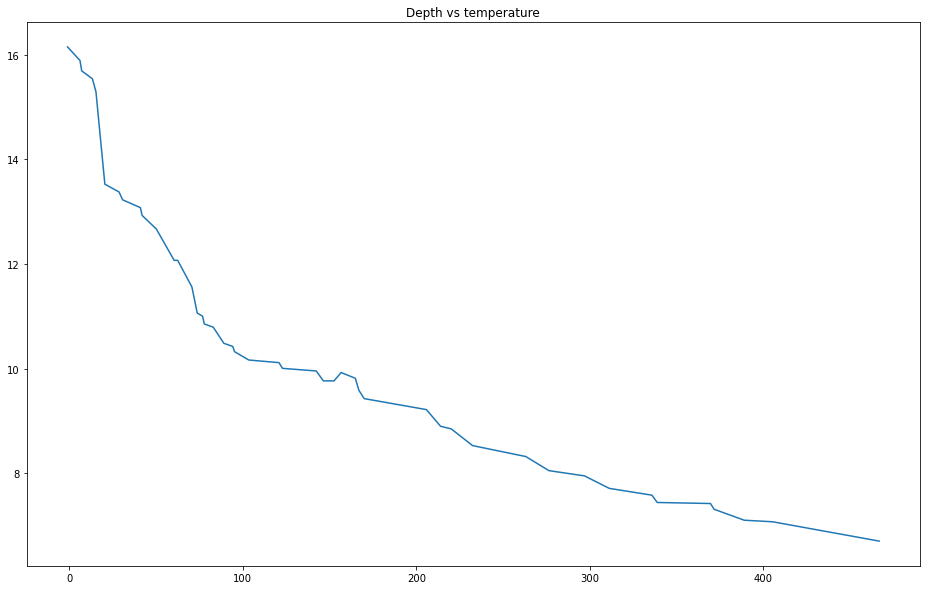

In [7]:
fig1 = matplotlib.pyplot.figure('xbt_profile', figsize=(16,10))
ax1 = fig1.add_subplot(1,1,1, title='Depth vs temperature')
_ = ax1.plot(eval(xbt_1966.loc[0,'depth_profile']),eval(xbt_1966.loc[0,'temperature_profile']))

In [8]:
import dask.dataframe

In [9]:
#dask.dataframe.read_csv(data_paths)

Things to note about the data engineering of this dataset
* data split by year for parallel access
* data currently accessed through mutliple files, would be better to present as a coherent dataset that abstracts away file access particulars
* minimal metadata in columns headers, columns such as country, institution etc. are metadata where depth and temperature profiles are the data.

## Gridded data

Gridded data has data stored as a multi-dimensional array. This usually covers a geographic area for a period of time, so will include at latitude, longitude and time as dimensions of the array. Some important characteristics of gridded data include:
* Separate  physical phenomena e.g. temperature, wind speed, precipitation, are separate arrays 
* In addition to latutitude, longitude and time, array dimensions might include ensemble member number, height (for representing the 3D atmosphere at multiple levels), forecast time (when the data was created) and others depending on context.
* Metadata is stored in a separate data structure for each array



In [10]:
import boto3
import botocore
import datetime
import matplotlib.pyplot as plt
import os.path
import s3fs

In [11]:
import xarray as xr
import matplotlib.pyplot
import iris
import iris.quickplot
import cartopy.crs

In [12]:
era5_bucket = 'era5-pds'

# AWS access / secret keys required
s3 = boto3.resource('s3')
bucket = s3.Bucket(era5_bucket)

# No AWS keys required
client = boto3.client('s3', config=botocore.client.Config(signature_version=botocore.UNSIGNED))

In [13]:
year_list = []
paginator = client.get_paginator('list_objects')
result = paginator.paginate(Bucket=era5_bucket, Delimiter='/')
for prefix in result.search('CommonPrefixes'):
    year_list += [prefix.get('Prefix')]

In [14]:
keys = []
date = datetime.date(2019,1,1) # update to desired date
prefix = date.strftime('%Y/%m/')

response = client.list_objects_v2(Bucket=era5_bucket, Prefix=prefix)
response_meta = response.get('ResponseMetadata')

if response_meta.get('HTTPStatusCode') == 200:
    contents = response.get('Contents')
    if contents == None:
        print("No objects are available for %s" % date.strftime('%B, %Y'))
    else:
        for obj in contents:
            keys.append(obj.get('Key'))
        print("There are %s objects available for %s\n--" % (len(keys), date.strftime('%B, %Y')))
        for k in keys:
            print(k)
else:
    print("There was an error with your request.")

There are 19 objects available for January, 2019
--
2019/01/data/air_pressure_at_mean_sea_level.nc
2019/01/data/air_temperature_at_2_metres.nc
2019/01/data/air_temperature_at_2_metres_1hour_Maximum.nc
2019/01/data/air_temperature_at_2_metres_1hour_Minimum.nc
2019/01/data/dew_point_temperature_at_2_metres.nc
2019/01/data/eastward_wind_at_100_metres.nc
2019/01/data/eastward_wind_at_10_metres.nc
2019/01/data/integral_wrt_time_of_surface_direct_downwelling_shortwave_flux_in_air_1hour_Accumulation.nc
2019/01/data/lwe_thickness_of_surface_snow_amount.nc
2019/01/data/northward_wind_at_100_metres.nc
2019/01/data/northward_wind_at_10_metres.nc
2019/01/data/precipitation_amount_1hour_Accumulation.nc
2019/01/data/sea_surface_temperature.nc
2019/01/data/sea_surface_wave_from_direction.nc
2019/01/data/sea_surface_wave_mean_period.nc
2019/01/data/significant_height_of_wind_and_swell_waves.nc
2019/01/data/snow_density.nc
2019/01/data/surface_air_pressure.nc
2019/01/main.nc


In [15]:
fs1 = s3fs.S3FileSystem()

In [16]:
path1 = f's3://{era5_bucket}/2019/01/data/air_temperature_at_2_metres.nc'

In [17]:
fileObj1 = fs1.open(path1)

In [18]:
temp_201901 = xr.open_dataset(fileObj1, engine='h5netcdf')


In [19]:
temp_201901

<xarray.Dataset>
Dimensions:                      (lon: 1440, lat: 721, time0: 744)
Coordinates:
  * lon                          (lon) float32 0.0 0.25 0.5 ... 359.5 359.8
  * lat                          (lat) float32 90.0 89.75 89.5 ... -89.75 -90.0
  * time0                        (time0) datetime64[ns] 2019-01-01 ... 2019-0...
Data variables:
    air_temperature_at_2_metres  (time0, lat, lon) float32 ...
Attributes:
    source:       Reanalysis
    institution:  ECMWF
    title:        ERA5 forecasts

In [ ]:
temp_201901_array = temp_201901.air_temperature_at_2_metres

In [ ]:
europe_temp = temp_201901.loc[{'time0':slice('2019-01-05','2019-01-07'), 'lat':slice(60,40),'lon':slice(0,15)}].air_temperature_at_2_metres

In [ ]:
europe_temp

In [ ]:
europe_temp_cube = europe_temp.to_iris()
europe_temp_cube

In [ ]:
europe_temp_cube.interpolate([('latitude', 51.0),('longitude', 1)],iris.analysis.Linear()).data

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(8,16))
ax1 = fig1.add_subplot(1,1,1,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(europe_temp_cube[0,:,:],axes=ax1)
ax1.coastlines()

### Data Catalogues

We have looked at some datasets which we have accessed primarily as individual files. This is the second level in the levels of data abstraction presented earlier. The user still needs to know a lot about reading files and then joining the data read in from files into a coherent object in memory. We want to move to presenting data not just as a series of dozens or even millions of files that user has to join together. We want to absract away the storage details and present the user with a **dataset**. We would ideally like to group similar datasets together to make them accessible through **data catalogues**. One tolols for doing this is the *Intake catalog* library. 

This is a framework for creating catalogues of datasets and accessing them in such a way that user gets back from the catalogue an object in memory that is ready for analysis. This is usually a *lazy object*, where the metadata is loaded so there is sufficient information to schedule computation through somewthing like a dask task grpah, but the actual data wikll be loaded when the computation of the task graph is triggered. At that time the data that is actually needed for the computation will downloaded, which each distributed worker downloading only the data needed for their part in the task graph. Catalogues also support searching and subsetting, so you can find the data in the catalogue easily and then access only the data that you need.

Intake has 2 main parts
* *Catalog yaml files* - A yaml file describing the data in the catalog.
  * These can be nested, so a catalog can be composed of the contents of several other catalogues.
* *Driver python modules* - The accessing of data is handled through driver
  * Intake supplies drivers in the standard install for the most common data types e.g. CSV
  * Many different formats of data can be supported through this framework through implementation
  * Driver can include custom functionality needed to support different modes of accessing particular sorts of data.

Catalogs can be installed as one does a normal python package through conda or pip or similar. This will add components to intake
  
More information:
* Intake https://intake.readthedocs.io/en/latest/
* Intake ESM - A package for accessing earth system data
* Met Office Weather Forecast Model Intake Catalog - https://github.com/informatics-lab/intake_informaticslab

* WARNING - met office intake catalog not working!! *

TODO: replace with CMIP6 intake catalog?

maybe using EDR / STAC ?


In [ ]:
import intake

In [ ]:
def print_cat_items(cat, indent=0):
    if(isinstance(cat, intake.catalog.Catalog)):
        for cat_item in list(cat):
            print(" "*indent + cat_item)
            print_cat_items(cat[cat_item], indent+2)

In [ ]:
intake.cat.met_office.weather_forecasts

In [ ]:
print_cat_items(intake.cat)

In [ ]:
mogreps_g_ds = intake.cat.met_office.weather_forecasts.mogreps_g.single_level(license_accepted=True).to_dask()
mogreps_g_ds

In [ ]:
subset_uk = mogreps_g_ds.loc[{'forecast_reference_time': '2021-03-01T00:00:00', 'realization': 0, 'latitude': slice(50, 60), 'longitude': slice(-5,5)}]

In [ ]:
import iris.quickplot

In [ ]:
time_series_exeter = subset_uk.temperature_at_surface.interp(latitude=51, longitude=-3)

In [ ]:
time_series_exeter_cube = time_series_exeter.to_iris()

In [ ]:
iris.quickplot.plot(time_series_exeter_cube)

In [ ]:
temp_cube = subset_uk.temperature_at_surface[0,:,:].to_iris()

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(8,16))
ax1 = fig1.add_subplot(1,1,1,projection=cartopy.crs.PlateCarree())
iris.quickplot.contourf(temp_cube,axes=ax1)
ax1.coastlines()

In this example, we see that there is intuitive access to the dataset as a whole and to the parts of the dataset. We can perform simple operation with minimal code, and interact using physically meaningful value e.g. latitude and longtidue, rather than arbitrary numerical indices.  We can see here that a catalogue priovides a more intuitive way for a researcher to access the data without having to understand the technical details of how it is being stored. 

Feaures of this catalog include:
* Quick access to to emtadata to see what is contained
* Lazy loading so can quickly set up operations.
* inuittive interface to data through meaningful values e.g. latitude, longitude.
* task graph created based on lazy data object
* when computation is triggered it is distributed to workers in a cluster
* results can be quickly computed and gathered to be interacted with in the notebook.

### Acknowledgement
Creation of this material was funded by the [Joint Centre for Excellence in Environmental Intelligence](https://jceei.org).
![JCEEI logo](https://github.com/informatics-lab/PangeoLectures/raw/main/LOGO_aligned-jceei-logo-dark-long.png)